<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0724_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


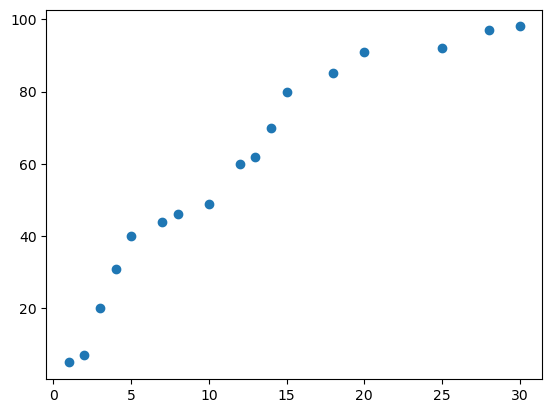

In [ ]:
# matplotlib 차트 그래프 그려주는 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# key 값 만듬 컴럼 두개 x 데이터 t는 정답 데이터
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

display(df.head())

# 독립변수가 1개 이고 종속 변수가 연속적인 숫자값으로 되어 있음
# 종속변수가 분류값이 아니기 때문에
# 우리 예제는 Linear Regression 입니다. 만약 종속 변수가 분류값이면
# 우리 예제는 classification 이라고 함
# 특히 독립 변수가 1개인 경우 => Simple Linear Regression
# 독립변수가 1개인 simple linear ression (선형회귀)는 1차직선 표현
# 일단 데이터를 화면에 그래프로 표현
# 데이터를 2차원 평면에 점을 찍어서 표현 => scatter를 이용

plt.scatter(df['공부시간(x)'], df['시험점수(t)']) #t로 표현 y 축을 .. 오류 일어남
plt.show()
# 컬럼인덱싱 series x축을 깔겠다. y축으로 점으로 찍힌다. 데이터 분표
# scatter

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


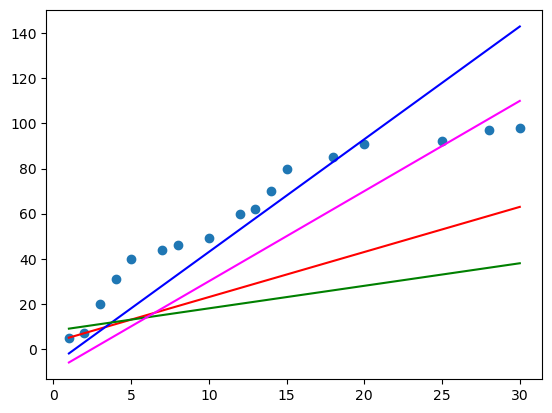

In [ ]:
# 고전적 선형회귀 모델의 일반식을 적어보시오.
# 독립변수가 1개인 위의 예제에 대해 선형회귀모델 그림 한번 만들어보자.
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

display(df.head())

plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
# y =ax+b => 우리의 모델 직선의 그래프
# 그래프 적을 분포가 어느정도 일치하게는 학습시키는 머신러닝
plt.plot(df['공부시간(x)'],df['공부시간(x)']* 2+3, color='r')
plt.plot(df['공부시간(x)'],df['공부시간(x)']* 5-7, color='b')
plt.plot(df['공부시간(x)'],df['공부시간(x)']* 1+8, color='g')
plt.plot(df['공부시간(x)'],df['공부시간(x)']* 4-10, color='magenta')
# 데이터와 가장 잘어울리는(데이터를 가장 잘 표현하는)
# 직선을 찾아가는 과정 => learning(학습)
# 자 식을 다르게 표현
# y = ax+b 사용 독립변수 1개 일때,
# 머신러닝에서는 이걸 y = Wx +b 이렇게 표현합니다.
# (w= weight,b= bias)
# 따라서 독립변수가 1개인 경우에 우리의 희귀모델은 y = ax+b 이렇게 표현
# 독립변수가 여러개 있을 경우 곡선, 평면, 3차원표현

plt.show()




In [ ]:
# 그러면 어떻게 직선을 찾는건가요?
# Error라는 용어 (오차)
# 오차는 실체값과 예측된 값의 차이를 지칭해요. (t와 y의 간격을 지칭) t는 정답
# 이 오차는 간격이 있기 때문에 음수값을 가진다.
# 오차의 식은 => t-y
# 오차는 당연히 각각의 점들마다 하나씩 나오게 된다.
# 이 오차들을 모아서 데이터와 모델간의 차이를 숫자 하나로 표현
# 그래서 오차들은 그냥 합치면 안됨( 부호 문제로 어떤 수가 음수 얌수 문제)
# 부호 없애기 절대치, 제곱근 하면 없어짐
# 각각의 오차들을 제곱해서 이들의 평균을 구함
# => 이 값으로 모델과 데이터의 차이를 명시함

# 평균 제곱 오차(Mean Squared Error)

# 그러면 이 평귭 제곱 오차는 가장 작은 model을 찾으면 됨
# model(y=Wx+b) w와 b를 구하면 된다.
# 이 MSE가 최소가 되는 W와 B 찾으면 됨

# => 이걸 어떻게 찾나요? => Loss Function 이라는 함수 등장
# 손실함수 loss function , 비용 함수 cost function

# 기본적으로 W와 b를 구하기 위한 기준 함수 => 이 값이 작으면 좋은 모델이 될수 있음
# loss 함수 사용
# 우리 예제에서는 loss 함수 역활을 누가 하냐면 => MSE 가 대신 일한다.

#






In [ ]:
#간단한 구현
import numpy as np
import pandas as pd
import tensorflow as tf

# 그림에서 봣을 때 모델이 있음

from tensorflow.keras.models import Sequential
# Sequential => 우리의 모델 박스

from tensorflow.keras.layers import Flatten, Dense
# Flatten = input layers, Dense = output layers 용도로 사용

from tensorflow.keras.optimizers import SGD
#W 와 b를 update 하기 위해 gradient Descent라는 알고리즘 간단히 설명
# 이 기능을 하는 것들을 통칭해서 optimizer
# SGD 기본 알고리즘 사용

# training data set 데이터 확보
# 지도 학습을 하고 있으니, 당연히 x 데이터와 t 데이터가 있어요.
# 내부적으로 2차원 merticx 행렬곱 연산이 수행으로 인해
# 당연히 x 데이터와 t 데이터는 2차원 으로 표현 해야합니다.

# np파일 가지고 1차원 . reshape 2차원으로 만듬 5행 1열 메트릭스 형식으로 만듬
x_data = np.array([1,2,3,4,5]).reshape(5,1)

t_data = np.array([3,5,7,9,11]).reshape(5,1)

# 데이터 준비가 끝남
# 그림 그리면 됨, model 만들자. 아까 그린 그림을 코드롤 변환

# 일단 model 부터 그려봐요
model = Sequential()
# model 안에 기둥을 세워보기 순서 확인하기
model.add(Flatten(input_shape=(1,))) # tuple로 표현 () 1,input 한개 독립변수 한개
model.add(Dense(1,activation='linear')) # linear 로 계산 해야한다.

# model 속성을 지정
model.compile(optimizer=SGD(learning_rate=1e-2),
             loss='mse')

# 학습을 시작해
model.fit(x_data,
         t_data,
        epochs=5000,
         verbose=0) # 5000번 반복하세요. verbose 출력 메세지 1로 하면 죽죽 떨어짐



In [ ]:
# 이제 학습이 끝났다. 예측 보자.
result = model.predict([[10]]) # 2차원으로
print(result)

# 데이터 만드는거과 이해와 원리를 알아야 만들수 잇다.

1/1 [==============================] - 0s 131ms/step
[[21.000032]]
